# A code example: The intraday seasonality of the transaction volume

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def binning(x,y,nbin=10,eq = True):
    step = (np.max(x)-np.min(x))/(nbin)
    X = []
    Y = []
    Yerr = []
    tmpY = []
    start = np.min(x)+step
    if eq:
        for i in range(len(x)):
            while x[i] > start:
                X.append(start-step/2)
                Y.append(np.mean(tmpY))
                #Xerr.append(np.std(tmpX,ddof=1) /np.sqrt(len(tmpX)) )
                Yerr.append(np.std(tmpY,ddof=1) /np.sqrt(len(tmpY)) )
                start += step
                tmpY=[]
                pass
            tmpY.append(y[i])
            pass
        if len(tmpY)!=0:
            X.append(start-step/2)
            Y.append(np.mean(tmpY))
            Yerr.append(np.std(tmpY,ddof=1) /np.sqrt(len(tmpY)) )
        return X,Y,Yerr
        pass
    else:
        tmpX = []
        Xerr = []
        for i in range(len(x)):
            while x[i] > start:
                X.append(np.mean(tmpX))
                Y.append(np.mean(tmpY))
                Xerr.append(np.std(tmpX,ddof=1) /np.sqrt(len(tmpX)) )
                Yerr.append(np.std(tmpY,ddof=1) /np.sqrt(len(tmpY)) )
                start += step
                tmpX=[]
                tmpY=[]
                pass
            tmpX.append(x[i])
            tmpY.append(y[i])
            pass
        if len(tmpY)!=0:
            X.append(np.mean(tmpX))
            Y.append(np.mean(tmpY))
            Xerr.append(np.std(tmpX,ddof=1) /np.sqrt(len(tmpX)) )
            Yerr.append(np.std(tmpY,ddof=1) /np.sqrt(len(tmpY)) )
        return X, Y, Yerr

In [3]:
def IntradaySeasonality_TransactionVolume(t, vol,start=34200 , end= 57600 ,step = 60):
    t = np.array(t)
    T = np.arange(start,end+step,step)
    result = np.zeros(len(T)-1)
    prev = t[0]
    for i in range(len(T)-1):
        use = ((T[i]<=t) & (t<T[i+1]))
        tmp_t = np.sum(vol[use])
        result[i] = tmp_t
        pass
    return T[1:] -step/2, result/np.sum(result)

In [4]:
INTC_LOB   = np.sort(["../../Data/INTC/"+i for i in os.listdir("../../Data/INTC") if i[-8]=="k"])
TSLA_LOB   = np.sort(["../../Data/TSLA/"+i for i in os.listdir("../../Data/TSLA") if i[-8]=="k"])
INTC_order = np.sort(["../../Data/INTC/"+i for i in os.listdir("../../Data/INTC") if i[-8]!="k"])
TSLA_order = np.sort(["../../Data/TSLA/"+i for i in os.listdir("../../Data/TSLA") if i[-8]!="k"])

In [7]:
TSLA_t,TSLA_y = [[] for i in range(len(TSLA_order))],[[] for i in range(len(TSLA_order))]
n = 0
for i in (TSLA_order):
    data = pd.read_csv(i,header=None)
    execution = data[(data[1] == 4) | (data[1] == 5)][[0,3]].values
    a,b = IntradaySeasonality_TransactionVolume(execution[:,0],execution[:,1])
    TSLA_t[n] = a.copy()
    TSLA_y[n] = b.copy()
    n+=1
    pass

INTC_t,INTC_y = [[] for i in range(len(INTC_order))],[[] for i in range(len(INTC_order))]
n = 0
for i in (INTC_order):
    data = pd.read_csv(i,header=None)
    execution = data[(data[1] == 4) | (data[1] == 5)][[0,3]].values
    a,b = IntradaySeasonality_TransactionVolume(execution[:,0],execution[:,1])
    INTC_t[n] = a.copy()
    INTC_y[n] = b.copy()
    n+=1
    pass

In [8]:
INTC_y = np.array(INTC_y)
INTC_Y = [np.mean(INTC_y[:,i]) for  i in range(len(INTC_t[0]))]
INTC_Yerr = [np.std(INTC_y[:,i],ddof=1)/np.sqrt(len(INTC_t)) for  i in range(len(INTC_t[0]))]

TSLA_y = np.array(TSLA_y)
TSLA_Y = [np.mean(TSLA_y[:,i]) for  i in range(len(TSLA_t[0]))]
TSLA_Yerr = [np.std(TSLA_y[:,i],ddof=1)/np.sqrt(len(TSLA_t)) for  i in range(len(TSLA_t[0]))]

Text(0.5, 1.0, 'TSLA')

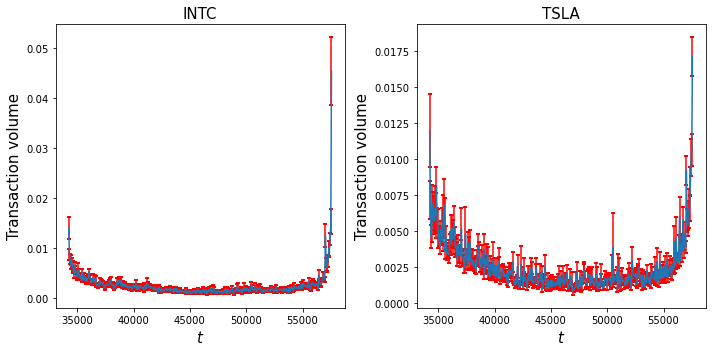

In [10]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5),tight_layout=True)
ax1.errorbar(TSLA_t[0],INTC_Y,INTC_Yerr,capthick=2,capsize=2,ecolor="red")
ax1.set_ylabel("Transaction volume",fontsize=15)
ax1.set_xlabel(r"$t$",fontsize=15)
ax1.set_title("INTC",fontsize=15)

ax2.errorbar(TSLA_t[0],TSLA_Y,TSLA_Yerr,capthick=2,capsize=2,ecolor="red")
ax2.set_ylabel("Transaction volume",fontsize=15)
ax2.set_xlabel(r"$t$",fontsize=15)
ax2.set_title("TSLA",fontsize=15)

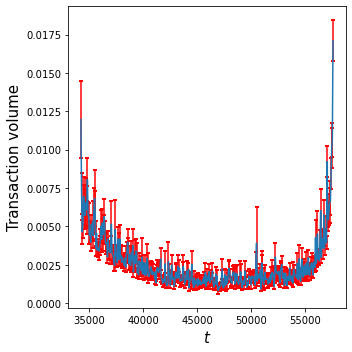

In [12]:
fig,(ax2) = plt.subplots(1,1,figsize=(5,5),tight_layout=True)
ax2.errorbar(TSLA_t[0],TSLA_Y,TSLA_Yerr,capthick=2,capsize=2,ecolor="red")
ax2.set_ylabel("Transaction volume",fontsize=15)
ax2.set_xlabel(r"$t$",fontsize=15)
#ax2.set_title("TSLA",fontsize=15)
plt.savefig("Intraday_transactionvol.png")
plt.savefig("../../../docs/CodeExample/StylizedFacts/Intraday_transactionvol.png")